In [11]:
import pandas as pd

Columns = ["duration","protocol_type","service","flag","src_bytes",
     "dst_bytes","land","wrong_fragment","urgent","hot","num_failed_logins",
     "logged_in","num_compromised","root_shell","su_attempted","num_root",
     "num_file_creations","num_shells","num_access_files","num_outbound_cmds",
     "is_host_login","is_guest_login","count","srv_count","serror_rate",
     "srv_serror_rate","rerror_rate","srv_rerror_rate","same_srv_rate",
     "diff_srv_rate","srv_diff_host_rate","dst_host_count","dst_host_srv_count",
     "dst_host_same_srv_rate","dst_host_diff_srv_rate","dst_host_same_src_port_rate",
     "dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate",
     "dst_host_rerror_rate","dst_host_srv_rerror_rate","label","difficulty"]



data = pd.read_csv("NSL_KDD/KDDTrain+.csv", header=None, names = Columns)
data.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,difficulty
count,125973.00000,1.259730e+05,1.259730e+05,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,...,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000
mean,287.14465,4.556674e+04,1.977911e+04,0.000198,0.022687,0.000111,0.204409,0.001222,0.395736,0.279250,...,115.653005,0.521242,0.082951,0.148379,0.032542,0.284452,0.278485,0.118832,0.120240,19.504060
std,2604.51531,5.870331e+06,4.021269e+06,0.014086,0.253530,0.014366,2.149968,0.045239,0.489010,23.942042,...,110.702741,0.448949,0.188922,0.308997,0.112564,0.444784,0.445669,0.306557,0.319459,2.291503
min,0.00000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.00000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000
50%,0.00000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,63.000000,0.510000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000
75%,0.00000,2.760000e+02,5.160000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000,21.000000
max,42908.00000,1.379964e+09,1.309937e+09,1.000000,3.000000,3.000000,77.000000,5.000000,1.000000,7479.000000,...,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,21.000000


In [13]:
from sklearn import preprocessing 

data.protocol_type = preprocessing.LabelEncoder().fit_transform(data["protocol_type"])

data.service = preprocessing.LabelEncoder().fit_transform(data["service"])

data.flag = preprocessing.LabelEncoder().fit_transform(data["flag"])

data.label = preprocessing.LabelEncoder().fit_transform(data["label"])





In [15]:
x = data[Columns].as_matrix()
y = data.label.as_matrix()


/Users/paul.tgr/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.
/Users/paul.tgr/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


/Users/paul.tgr/anaconda3/lib/python3.7/site-packages/scipy/stats/morestats.py:1653: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")
/Users/paul.tgr/anaconda3/lib/python3.7/site-packages/scipy/stats/morestats.py:1650: UserWarning: Input data for shapiro has range zero. The results may not be accurate.
  warnings.warn("Input data for shapiro has range zero. The results "


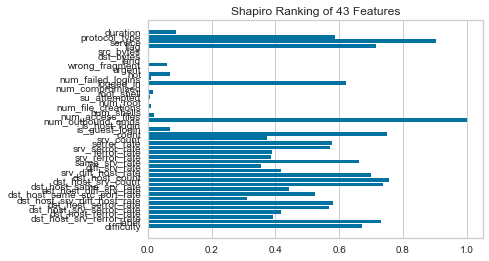

In [24]:
from yellowbrick.features import Rank1D, Rank2D, PCADecomposition
visualizer = Rank1D(features = Columns, algorithm = "shapiro")
visualizer.fit(x,y)
visualizer.transform(x)
visualizer.poof(outpath="Figure1.png") 

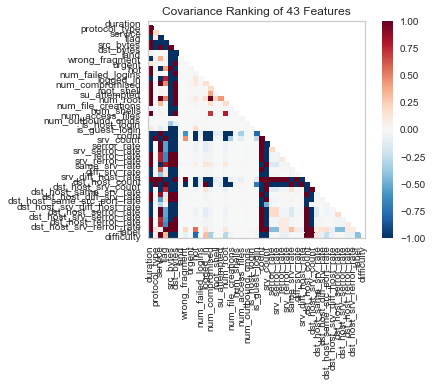

In [25]:
visualizer = Rank2D(features=Columns, algorithm='covariance')
visualizer.fit(X, y)
visualizer.transform(X)
visualizer.poof()

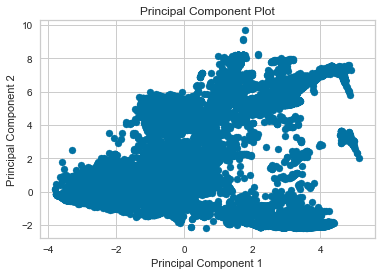

In [29]:
visualizer = PCADecomposition(scale=True, center=False, col=y)
visualizer.fit_transform(X,y)
visualizer.poof()

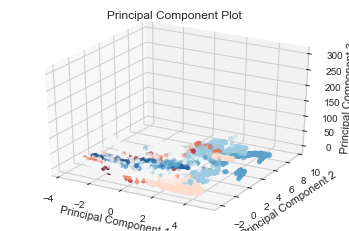

In [27]:
visualizer = PCADecomposition(scale=True, center=False, color=y, proj_dim=3)
visualizer.fit_transform(X,y)
visualizer.poof()

In [33]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.3, random_state = 0)

In [34]:
from sklearn.ensemble import RandomForestClassifier 
clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(x, y)
Score = clf.score(x_test,y_test)
print(Score*100)

/Users/paul.tgr/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


85.92823878069431
